In [21]:
%load_ext autoreload
%autoreload 2

from distvis.plots import (
    plot_histograms, 
    calc_wasserstein, 
    plot_discrete_histogram, 
    calc_total_variation,
    marginal_dependency_plot,
)
import plotly.io as pio
from plotly import express as px
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We can use the following lines of codes and set **interactive_plots=False** to make static plots that can be showed on Github

In [39]:
interactive_plots = True
if interactive_plots is False:
    pio.renderers.default = "jpg"

# Histograms

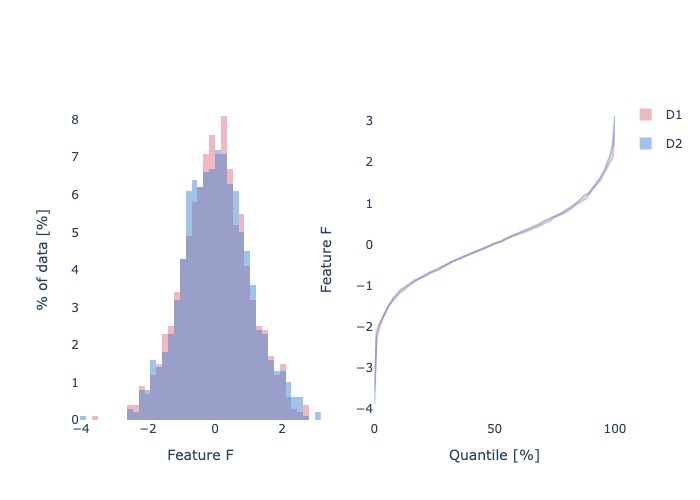

             distance
data1 data2          
D1    D2     0.005253


In [27]:
np.random.seed(1234)

f0 = np.random.randn(1000)
f1 = np.random.randn(1000)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_histograms(
    data_dict, xaxis_title='Feature F', nbins=40, 
    plot_hist=True, plot_cdf=False, plot_inv_cdf=True, showgrid=False)
fig.show()
print(calc_wasserstein(data_dict, normalize=True))

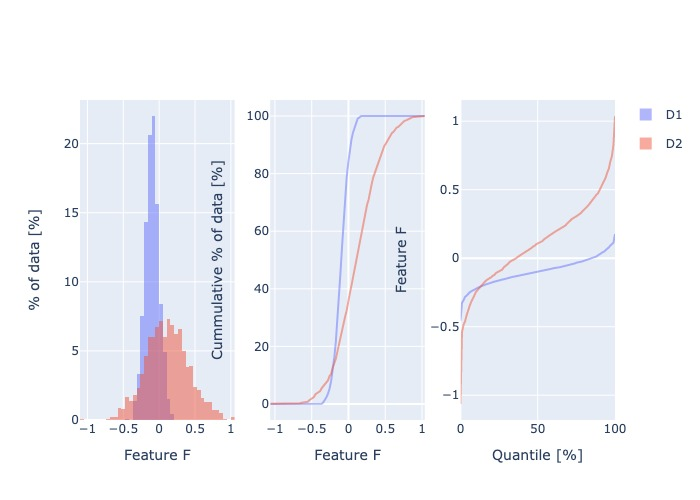

             distance
data1 data2          
D1    D2      0.11306


In [28]:
np.random.seed(1234)

f0 = np.random.normal(loc=-.1, scale=0.1, size=1000)
f1 = np.random.normal(loc=.1, scale=0.3, size=1000)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_histograms(
    data_dict, xaxis_title='Feature F', nbins=40,
    plot_hist=True, plot_cdf=True, plot_inv_cdf=True, color_cycle=px.colors.qualitative.Plotly
)
fig.show()
print(calc_wasserstein(data_dict, normalize=True))

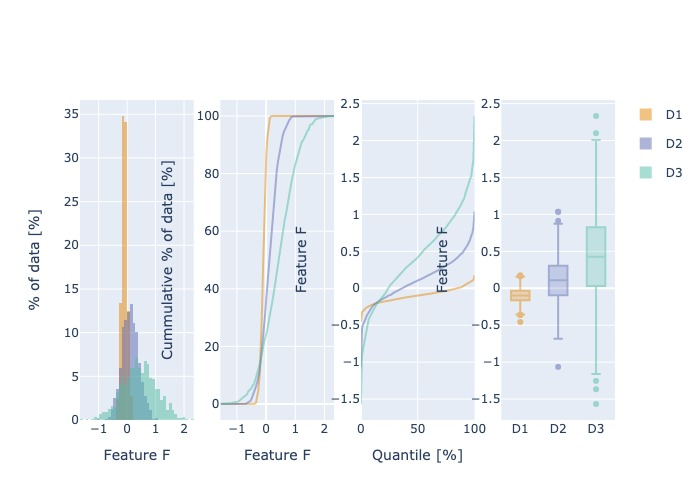

             distance
data1 data2          
D1    D2     0.060955
      D3     0.153349
D2    D3     0.092564


In [32]:
np.random.seed(1234)

f0 = np.random.normal(loc=-.1, scale=0.1, size=1000)
f1 = np.random.normal(loc=.1, scale=0.3, size=1000)
f3 = np.random.normal(loc=.4, scale=0.6, size=1000)

data_dict = {
    'D1': f0,
    'D2': f1,
    'D3': f3,
}

fig = plot_histograms(
    data_dict, xaxis_title='Feature F', nbins=40,
    plot_hist=True, plot_cdf=True, plot_inv_cdf=True, plot_box = True, color_cycle=px.colors.qualitative.Vivid
)
fig.show()
print(calc_wasserstein(data_dict, normalize=True))

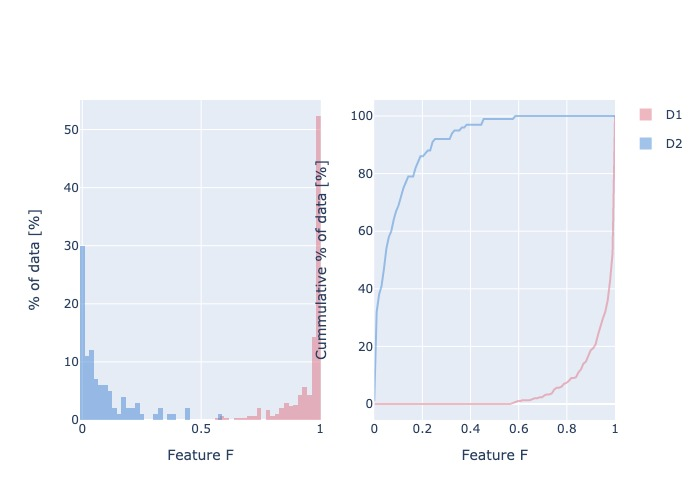

             distance
data1 data2          
D1    D2     0.860262


In [33]:
np.random.seed(1234)

f0 = np.random.beta(a=5, b=0.3, size=300)
f1 = np.random.beta(a=.4, b=4, size=100)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_histograms(data_dict, xaxis_title='Feature F', nbins=30, plot_cdf=True)
fig.show()
print(calc_wasserstein(data_dict, normalize=True))

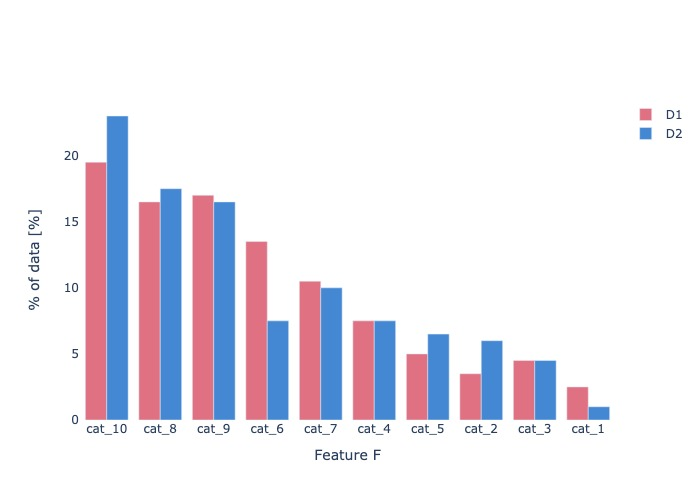

,,distance
data1,data2,
D1,D2,0.17


In [35]:
np.random.seed(1234)

n_categs = 10
samples = 200
categs = [f'cat_{i}' for i in range(1, n_categs+1)]

p0 = np.random.dirichlet(alpha=10000*np.arange(1, n_categs+1))
p1 = np.random.dirichlet(alpha=10000*np.arange(1, n_categs+1))


f0 = np.random.choice(categs, p=p0, size=samples)
f1 = np.random.choice(categs, p=p1, size=samples)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_discrete_histogram(data_dict, xaxis_title='Feature F', showgrid=False)
fig.show()
calc_total_variation(data_dict)

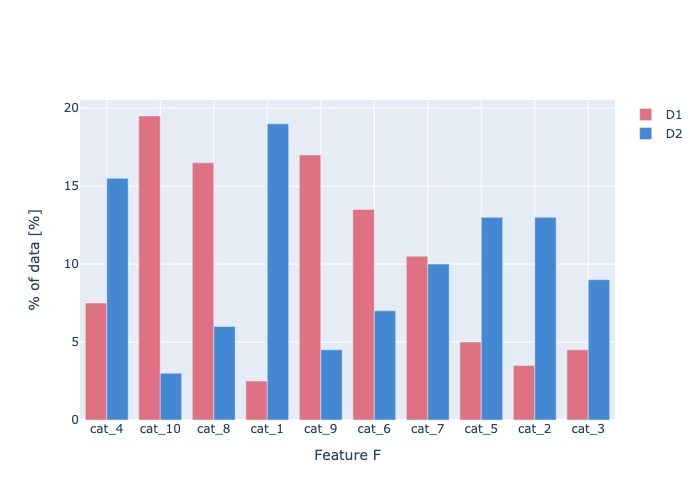

,,distance
data1,data2,
D1,D2,0.93


In [36]:
np.random.seed(1234)

n_categs = 10
samples = 200
categs = [f'cat_{i}' for i in range(1, n_categs+1)]

p0 = np.random.dirichlet(alpha=10000*np.arange(1, n_categs+1))
p1 = np.random.dirichlet(alpha=10000*np.arange(1, n_categs+1)[::-1])


f0 = np.random.choice(categs, p=p0, size=samples)
f1 = np.random.choice(categs, p=p1, size=samples)

data_dict = {
    'D1': f0,
    'D2': f1,
}

fig = plot_discrete_histogram(data_dict, xaxis_title='Feature F')
fig.show()
calc_total_variation(data_dict)

# Marginal dependence plots

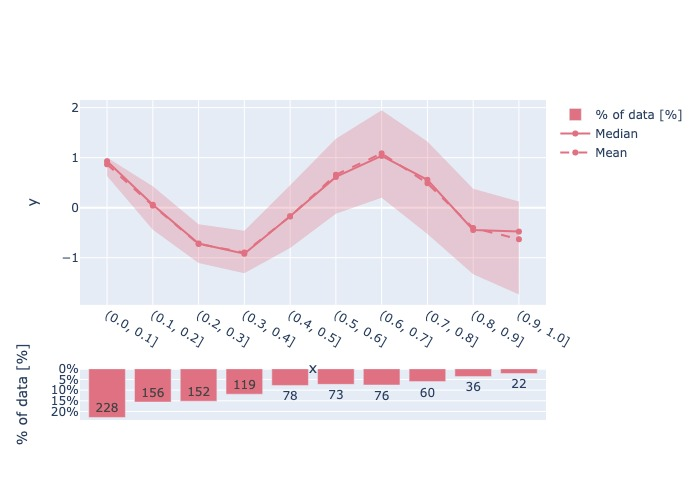

In [37]:
np.random.seed(1234)

x = np.random.beta(0.8, 1.6, 1000)
y = np.cos(10*x) + np.random.normal(0, x)
data = pd.DataFrame({'x': x, 'y': y})
bins = np.linspace(0, 1, 11)

fig = marginal_dependency_plot(data, feature='x', target='y', bins=bins, categorical_feature=False)
fig.show()

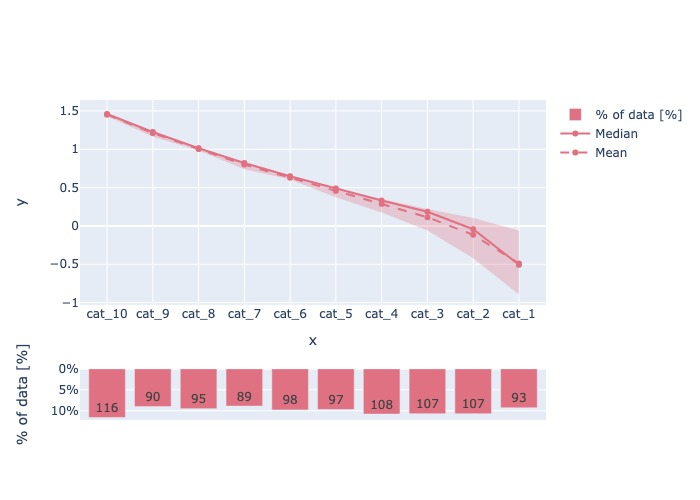

In [38]:
np.random.seed(1234)

n_categs = 10
samples = 200
categs = np.array([f'cat_{i}' for i in range(1, n_categs+1)])
x_index = np.random.randint(n_categs, size=1000)
x = categs[x_index]
y = np.exp(x_index/10) + np.random.beta(a=(x_index+1), b=1/(x_index+1))-2
data = pd.DataFrame({'x': x, 'y': y})
fig = marginal_dependency_plot(data, feature='x', target='y', categorical_feature=True)
fig.show()
